<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler #feature scaling

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

## Load and Prepare Data

In [7]:
country_vaccinations = pd.read_csv('country_vaccinations.csv')
country_vaccinations_by_manufacturer = pd.read_csv('country_vaccinations_by_manufacturer.csv')

## EDA

In [9]:
country_vaccinations.head(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [10]:
country_vaccinations.sample(2)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
22562,Poland,POL,2021-02-15,2159146.0,1500911.0,658235.0,36901.0,63419.0,5.70,3.97,1.74,1676.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://www.gov.pl/web/szczepimysie/raport-szc...
1242,Argentina,ARG,2021-07-05,22444129.0,18011944.0,4432185.0,264199.0,356078.0,49.66,39.85,9.81,7879.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


In [11]:
country_vaccinations.shape

(31240, 15)

In [12]:
country_vaccinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [13]:
country_vaccinations.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [14]:
country_vaccinations.nunique()

country                                  218
iso_code                                 218
date                                     226
total_vaccinations                     16997
people_vaccinated                      15954
people_fully_vaccinated                13072
daily_vaccinations_raw                 12463
daily_vaccinations                     17641
total_vaccinations_per_hundred          6967
people_vaccinated_per_hundred           5431
people_fully_vaccinated_per_hundred     3943
daily_vaccinations_per_million          9400
vaccines                                  53
source_name                               92
source_website                           148
dtype: int64

In [15]:
country_vaccinations[country_vaccinations.country == 'Germany'].shape

(201, 15)

In [16]:
country_vaccinations[country_vaccinations.country == 'Italy'].shape

(201, 15)

In [17]:
country_vaccinations[country_vaccinations.country == 'Iceland'].shape

(198, 15)

In [18]:
country_vaccinations[country_vaccinations.country == 'United States'].shape

(208, 15)

In [19]:
country_vaccinations[country_vaccinations.country == 'Czechia'].shape

(201, 15)

In [20]:
country_vaccinations["country"].value_counts()[:30]

country
Norway              226
Latvia              224
England             220
Scotland            220
Northern Ireland    215
Wales               215
United Kingdom      215
Canada              214
Russia              213
China               213
Denmark             211
Israel              209
United States       208
Qatar               206
Switzerland         206
Liechtenstein       206
Bahrain             205
Mexico              203
Costa Rica          202
Cayman Islands      202
Romania             201
Lithuania           201
Germany             201
Czechia             201
Portugal            201
Estonia             201
Italy               201
Chile               201
Slovenia            201
France              201
Name: count, dtype: int64

In [21]:
#Number of nulls
null_counts = country_vaccinations.groupby('country')['total_vaccinations'].apply(lambda x: x.isnull().sum()).reset_index()

null_counts.columns = ['country', 'null_count']
null_counts_sorted = null_counts.sort_values(by='null_count', ascending=False)
print(null_counts_sorted)

                      country  null_count
126                    Monaco         181
104                    Kuwait         176
45                 Costa Rica         169
188                    Sweden         167
201  Turks and Caicos Islands         167
..                        ...         ...
182               South Korea           0
113                 Lithuania           0
86                  Hong Kong           0
112             Liechtenstein           0
96                      Italy           0

[218 rows x 2 columns]


In [22]:
country_vaccinations.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [23]:
df5 = country_vaccinations.drop(columns=['iso_code', 'source_name', 'source_website'], axis=1).copy()
countries = df5['country'].unique()
imputed_df = pd.DataFrame()

for country in countries:
    country_data = df5[df5['country'] == country]    
    imputer = IterativeImputer(max_iter=10, random_state=0)    
    columns_to_impute = ["total_vaccinations", "people_vaccinated", "people_fully_vaccinated",
                          "daily_vaccinations_raw", "daily_vaccinations", 
                          "total_vaccinations_per_hundred", "people_vaccinated_per_hundred",
                          "people_fully_vaccinated_per_hundred", "daily_vaccinations_per_million"]
    
    if country_data[columns_to_impute].isnull().any().any():
        imputed_data2 = imputer.fit_transform(country_data[columns_to_impute])
        country_imputed_df = pd.DataFrame(imputed_data2, columns=columns_to_impute[:imputed_data2.shape[1]])
        
        for col in ['country', 'date', 'vaccines']:
            country_imputed_df[col] = country_data[col].values        
        imputed_df = pd.concat([imputed_df, country_imputed_df], ignore_index=True)

print(imputed_df.isnull().sum())

total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                   0
daily_vaccinations_raw                    0
daily_vaccinations                        0
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred           333
people_fully_vaccinated_per_hundred    1000
daily_vaccinations_per_million         5809
country                                   0
date                                      0
vaccines                                  0
dtype: int64


In [24]:
imputed_df.dropna(inplace=True)

In [25]:
imputed_df.isnull().sum()

total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
country                                0
date                                   0
vaccines                               0
dtype: int64

In [26]:
imputed_df.shape

(25431, 12)

In [27]:
country_vaccinations.shape

(31240, 15)

In [28]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25431 entries, 0 to 31239
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   total_vaccinations                   25431 non-null  float64
 1   people_vaccinated                    25431 non-null  float64
 2   people_fully_vaccinated              25431 non-null  float64
 3   daily_vaccinations_raw               25431 non-null  float64
 4   daily_vaccinations                   25431 non-null  float64
 5   total_vaccinations_per_hundred       25431 non-null  float64
 6   people_vaccinated_per_hundred        25431 non-null  float64
 7   people_fully_vaccinated_per_hundred  25431 non-null  float64
 8   daily_vaccinations_per_million       25431 non-null  float64
 9   country                              25431 non-null  object 
 10  date                                 25431 non-null  object 
 11  vaccines                         

In [29]:
imputed_df.sample(2)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,country,date,vaccines
4397,1341130.0,796827.0,544303.0,19344.0,12923.0,19.30,11.47,7.83,1860.0,Bulgaria,2021-05-28,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
9774,12719099.0,9576702.0,3142397.0,69987.0,255964.0,18.83,14.17,4.65,3788.0,France,2021-04-05,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


In [30]:
imputed_df['date'] = pd.to_datetime(imputed_df['date'])

imputed_df['Year'] = imputed_df['date'].dt.year.astype(int)
imputed_df['Month'] = imputed_df['date'].dt.month.astype(int)
imputed_df['Day'] = imputed_df['date'].dt.day.astype(int)

imputed_df.sample(2)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,country,date,vaccines,Year,Month,Day
23070,2.440930e+06,1.400720e+06,1.040210e+06,37765.000000,35732.0,84.720000,48.620000,36.110000,12402.0,Qatar,2021-05-27,"Moderna, Pfizer/BioNTech",2021,5,27
21733,5.249269e+05,3.252083e+05,1.997187e+05,20494.737612,21821.0,10.289696,6.375617,3.913333,4277.0,Palestine,2021-05-04,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",2021,5,4


In [31]:
imputed_df.sample(2)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,country,date,vaccines,Year,Month,Day
4501,4.450500e+04,4.450500e+04,-2.706214e-02,7126.000000,4784.0,0.270000,0.270000,-0.000273,286.0,Cambodia,2021-02-23,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac",2021,2,23
27423,3.939144e+06,2.558318e+06,1.380826e+06,423461.665485,14575.0,39.005599,25.331826,13.672193,1443.0,Sweden,2021-02-08,"Oxford/AstraZeneca, Pfizer/BioNTech",2021,2,8


In [32]:
df = imputed_df.copy()

In [33]:
countries = df['country'].unique()
df4 = pd.DataFrame({'country': countries})

label_encoder = LabelEncoder()

imputed_df['country_encoded'] = label_encoder.fit_transform(imputed_df['country'])

imputed_df.sample(2)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,country,date,vaccines,Year,Month,Day,country_encoded
23100,3008822.0,1.665031e+06,1.343791e+06,19576.0,18902.0,104.43,57.790000,46.640000,6561.0,Qatar,2021-06-26,"Moderna, Pfizer/BioNTech",2021,6,26,117
24581,4326576.0,2.302511e+06,2.024065e+06,76521.0,117269.0,12.43,6.636377,5.745653,3368.0,Saudi Arabia,2021-03-30,"Oxford/AstraZeneca, Pfizer/BioNTech",2021,3,30,124


In [34]:
df = imputed_df.copy()

In [35]:
df.sample(3)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,country,date,vaccines,Year,Month,Day,country_encoded
27689,1.803242e+06,1.116223e+06,688137.000000,47669.000000,28368.0,20.840000,12.900000,7.950000,3278.0,Switzerland,2021-04-09,"Moderna, Pfizer/BioNTech",2021,4,9,142
13768,1.397640e+05,1.397640e+05,-0.000030,62832.000000,34926.0,1.610000,1.610000,-0.001540,4035.0,Israel,2020-12-23,"Moderna, Pfizer/BioNTech",2020,12,23,71
15549,9.066127e+05,6.263046e+05,280308.088568,16929.449954,20832.0,12.460607,8.607656,3.853612,2863.0,Laos,2021-07-10,"Sinopharm/Beijing, Sputnik V",2021,7,10,80


In [36]:
vaccines = df['vaccines'].unique()
df4 = pd.DataFrame({'vaccines': vaccines})

label_encoder = LabelEncoder()

imputed_df['vaccines_encoded'] = label_encoder.fit_transform(imputed_df['vaccines'])

imputed_df.sample(2)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,country,date,vaccines,Year,Month,Day,country_encoded,vaccines_encoded
3544,1.671600e+05,1.485880e+05,18572.000000,2176.000000,4196.0,1.430000,1.270000,0.160000,359.0,Bolivia,2021-03-20,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",2021,3,20,17,29
18652,1.873501e+06,1.156083e+06,717418.449506,21781.853832,18090.0,57.148238,35.264464,21.883711,5518.0,Mongolia,2021-07-05,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",2021,7,5,95,29


In [37]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25431 entries, 0 to 31239
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   total_vaccinations                   25431 non-null  float64       
 1   people_vaccinated                    25431 non-null  float64       
 2   people_fully_vaccinated              25431 non-null  float64       
 3   daily_vaccinations_raw               25431 non-null  float64       
 4   daily_vaccinations                   25431 non-null  float64       
 5   total_vaccinations_per_hundred       25431 non-null  float64       
 6   people_vaccinated_per_hundred        25431 non-null  float64       
 7   people_fully_vaccinated_per_hundred  25431 non-null  float64       
 8   daily_vaccinations_per_million       25431 non-null  float64       
 9   country                              25431 non-null  object        
 10  date           

In [38]:
imputed_df.columns

Index(['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'country', 'date', 'vaccines', 'Year', 'Month', 'Day',
       'country_encoded', 'vaccines_encoded'],
      dtype='object')

In [39]:
new_order = ['country',
             'country_encoded',
             'date',
             'Year',
             'Month',
             'Day',
             'vaccines',
             'vaccines_encoded',
             'total_vaccinations',
             'people_vaccinated',
             'people_fully_vaccinated',
             'daily_vaccinations_raw',
             'daily_vaccinations',
             'total_vaccinations_per_hundred',
             'people_vaccinated_per_hundred',             
             'people_fully_vaccinated_per_hundred',
             'daily_vaccinations_per_million',
             ]
imputed_df = imputed_df[new_order]
imputed_df.sample(2)

,country,country_encoded,date,Year,Month,Day,vaccines,vaccines_encoded,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
3949,Brazil,19,2021-02-21,2021,2,21,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",14,6950802.0,5817908.0,1132894.0,137634.0,244837.0,3.27,2.74,0.53,1152.0
26339,Somalia,133,2021-06-09,2021,6,9,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac",34,143379.0,129733.0,13646.0,1361.0,823.0,0.90,0.82,0.09,52.0


In [40]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25431 entries, 0 to 31239
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              25431 non-null  object        
 1   country_encoded                      25431 non-null  int32         
 2   date                                 25431 non-null  datetime64[ns]
 3   Year                                 25431 non-null  int32         
 4   Month                                25431 non-null  int32         
 5   Day                                  25431 non-null  int32         
 6   vaccines                             25431 non-null  object        
 7   vaccines_encoded                     25431 non-null  int32         
 8   total_vaccinations                   25431 non-null  float64       
 9   people_vaccinated                    25431 non-null  float64       
 10  people_fully_va

In [41]:
imputed_df.sample(2)

,country,country_encoded,date,Year,Month,Day,vaccines,vaccines_encoded,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
15603,Latvia,81,2021-01-22,2021,1,22,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",9,19022.0,16841.0,2182.0,220.0,543.0,1.01,0.89,0.12,288.0
5658,China,28,2021-03-25,2021,3,25,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",4,91346000.0,622000000.0,223299000.0,5486300.0,2816476.0,6.35,43.21,15.51,1957.0


In [42]:
country_vaccinations = imputed_df.copy()

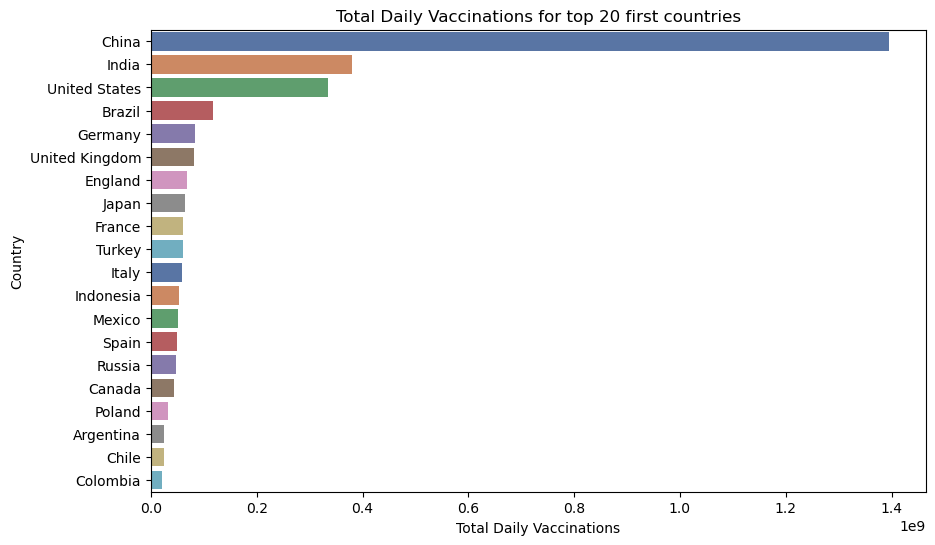

In [43]:
country_vaccinations_sum = country_vaccinations.groupby('country')['daily_vaccinations'].sum().reset_index()

country_vaccinations_sum_sorted = country_vaccinations_sum.sort_values(by='daily_vaccinations', ascending=False)[:20]

plt.figure(figsize=(10, 6))
sns.barplot(x='daily_vaccinations', y='country', data=country_vaccinations_sum_sorted,palette="deep")
plt.xlabel('Total Daily Vaccinations')
plt.ylabel('Country')
plt.title('Total Daily Vaccinations for top 20 first countries')
plt.show()

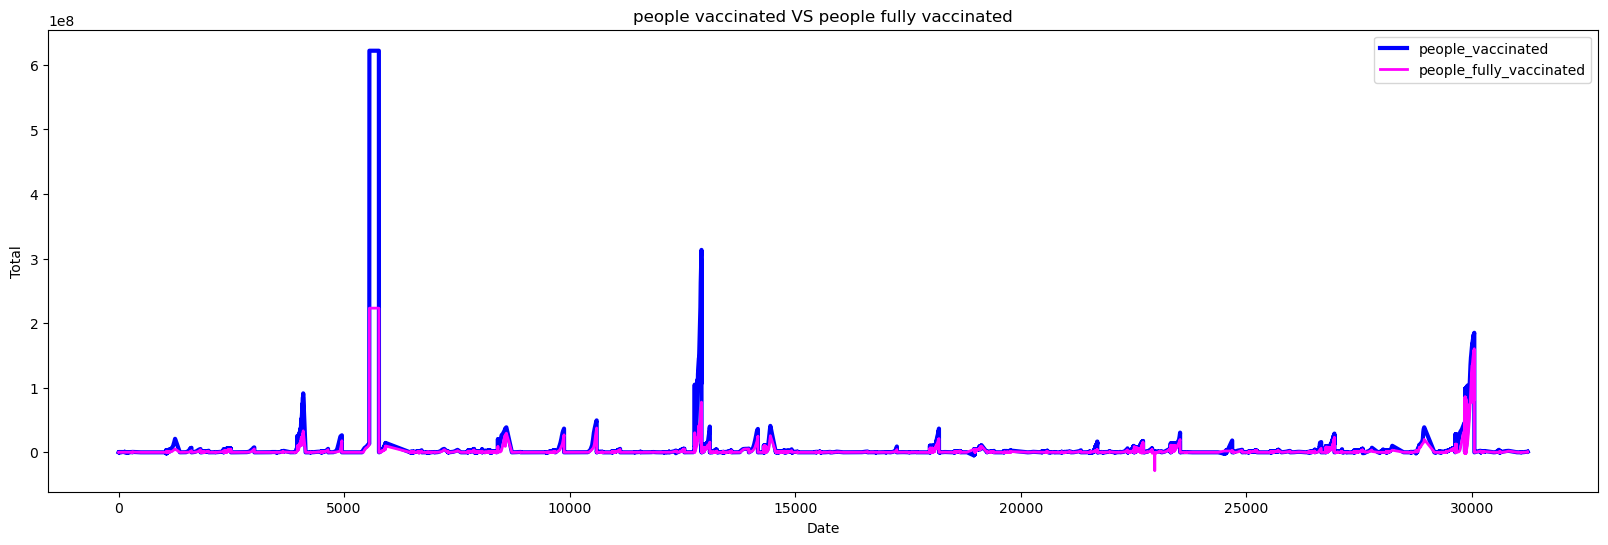

In [44]:
plt.figure(figsize=(20, 6))
plt.plot(country_vaccinations['people_vaccinated'], linewidth =3,label = "people_vaccinated",c = "blue")
plt.plot(country_vaccinations['people_fully_vaccinated'],linewidth = 2,label = "people_fully_vaccinated",c="magenta")
plt.xlabel('Date')
plt.ylabel('Total')
plt.title("people vaccinated VS people fully vaccinated")
plt.legend()

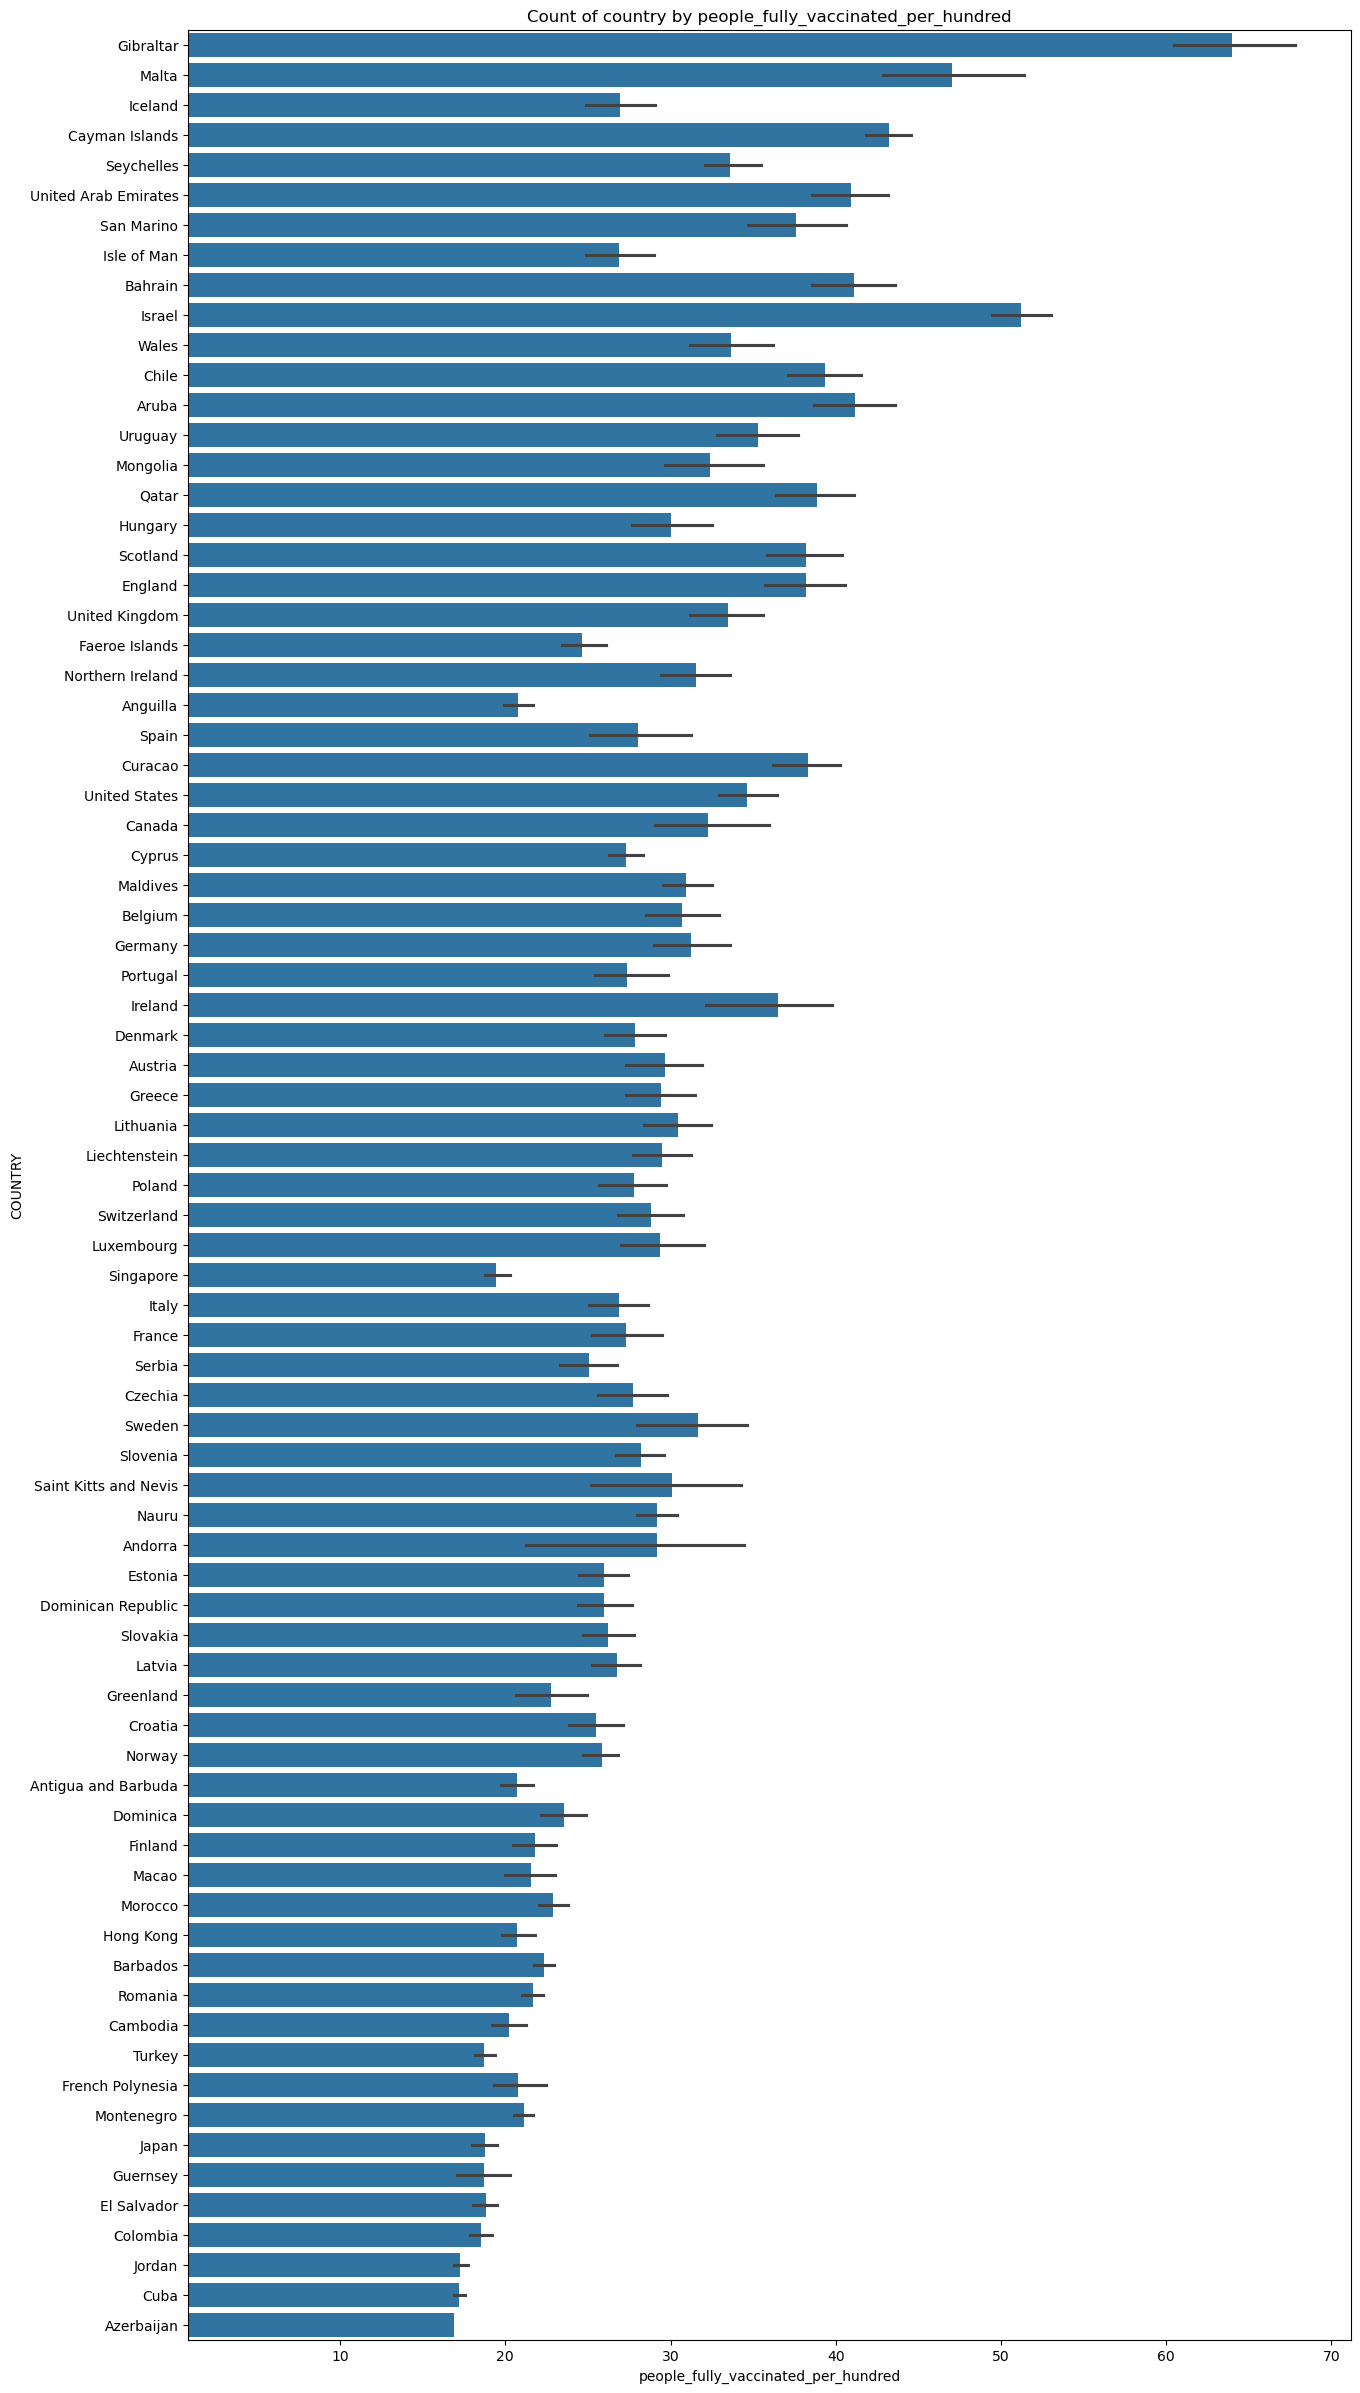

In [45]:

people_fully_vaccinated_per_hundred= country_vaccinations.sort_values(by='people_fully_vaccinated_per_hundred', ascending=False)[:5000]
figure = plt.figure(figsize=(15,30))
sns.barplot(y=people_fully_vaccinated_per_hundred.country, x=people_fully_vaccinated_per_hundred.people_fully_vaccinated_per_hundred)
plt.xticks()
plt.xlim(xmin=0.8)
plt.xlabel('people_fully_vaccinated_per_hundred')
plt.ylabel('COUNTRY')
plt.title('Count of country by people_fully_vaccinated_per_hundred')
plt.show()

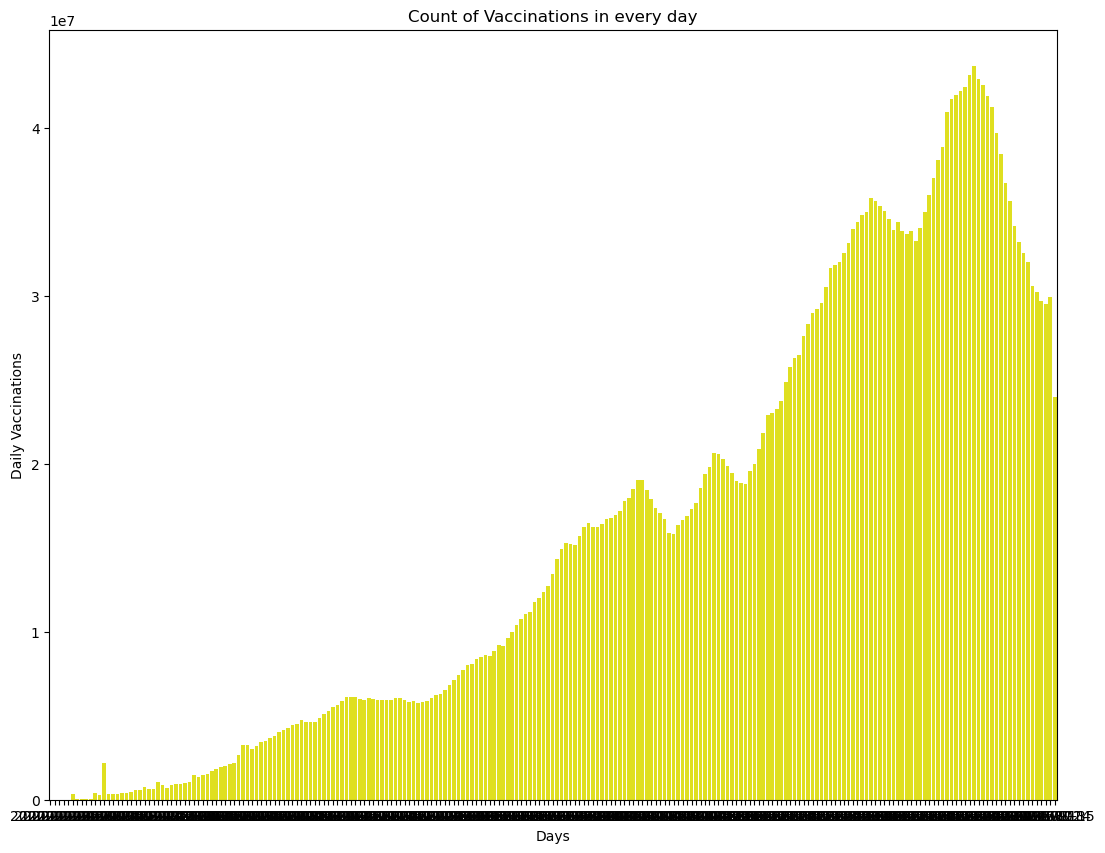

In [187]:
daily_vaccinations = country_vaccinations.groupby('date')['daily_vaccinations'].sum().reset_index()
figure = plt.figure(figsize=(13,10))
sns.barplot(y=daily_vaccinations.daily_vaccinations, x=daily_vaccinations.date, color="yellow")
plt.xticks()
plt.xlim(xmin=0.8)
plt.xlabel('Days')
plt.ylabel('Daily Vaccinations')
plt.title('Count of Vaccinations in every day')
plt.show()

<Figure size 1500x1500 with 0 Axes>

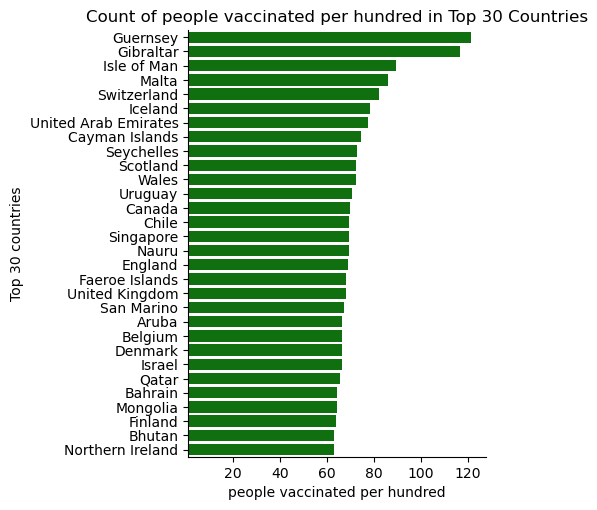

In [47]:
people_vaccinated_per = country_vaccinations.groupby('country')['people_vaccinated_per_hundred'].max().reset_index().sort_values(by='people_vaccinated_per_hundred', ascending=False)[:30]
figure = plt.figure(figsize=(15,15))
sns.catplot(y='country', x='people_vaccinated_per_hundred',data=people_vaccinated_per, kind='bar',color='green')
plt.xticks()
plt.xlim(xmin=0.8)
plt.xlabel('people vaccinated per hundred')
plt.ylabel('Top 30 countries')
plt.title('Count of people vaccinated per hundred in Top 30 Countries')
plt.show()

<Figure size 1500x1000 with 0 Axes>

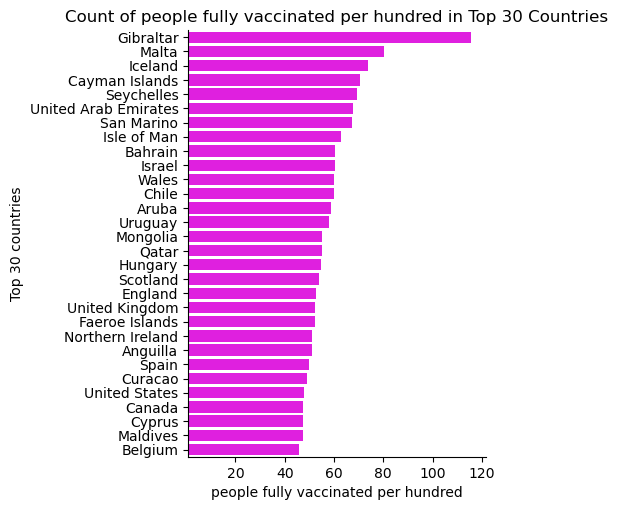

In [48]:
people_fully_vaccinated_per = country_vaccinations.groupby('country')['people_fully_vaccinated_per_hundred'].max().reset_index().sort_values(by='people_fully_vaccinated_per_hundred', ascending=False)[:30]
figure = plt.figure(figsize=(15,10))
sns.catplot(y='country', x='people_fully_vaccinated_per_hundred',data=people_fully_vaccinated_per, kind='bar', color="magenta")
plt.xticks()
plt.xlim(xmin=0.8)
plt.xlabel('people fully vaccinated per hundred')
plt.ylabel('Top 30 countries')
plt.title('Count of people fully vaccinated per hundred in Top 30 Countries')
plt.show()

In [49]:
country_vaccinations.sample(1)

,country,country_encoded,date,Year,Month,Day,vaccines,vaccines_encoded,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
22683,Poland,115,2021-06-16,2021,6,16,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",9,25482985.0,15810905.0,10485703.0,279077.466992,320406.0,67.33,41.78,27.71,8466.0


In [50]:
data = imputed_df.drop(columns=['country', 'date', 'vaccines'], axis=1)

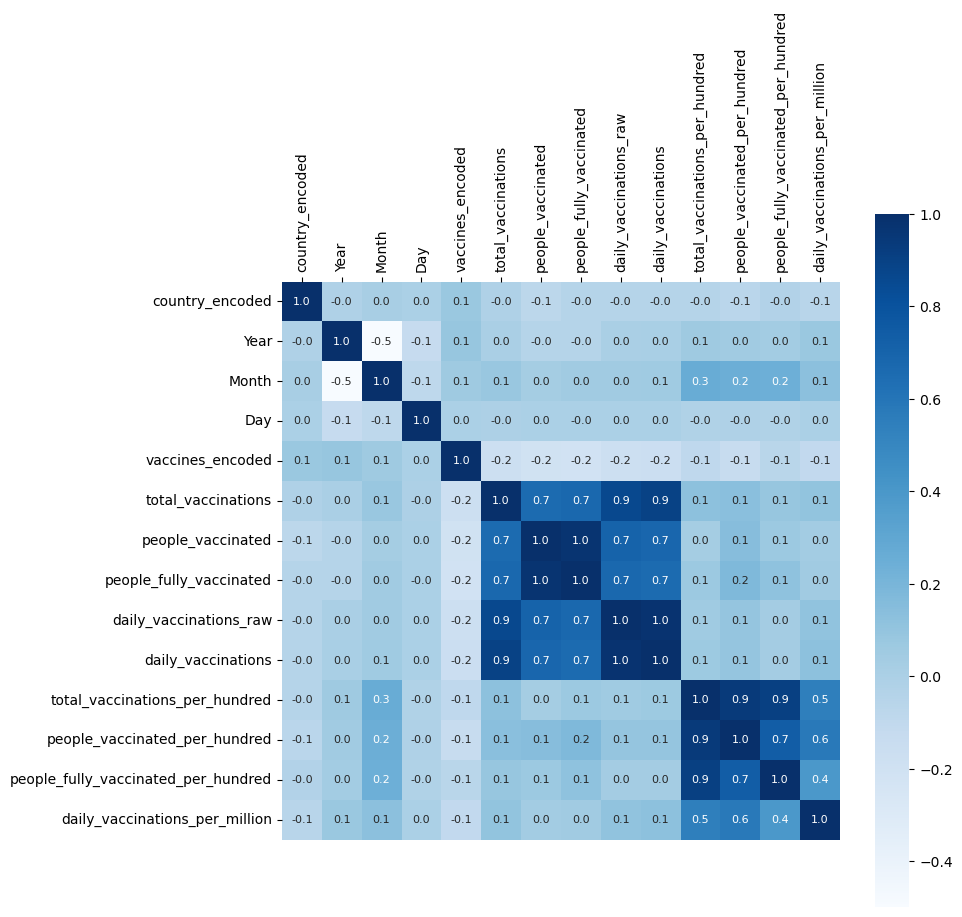

In [51]:
corr = data.corr()
corr.shape
plt.figure(figsize=(9,9))
ax = sns.heatmap(corr , annot=True , cbar=True, square= True, fmt='.1f', annot_kws={'size':8}, cmap='Blues')
ax.set(xlabel="", ylabel="")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.xaxis.tick_top()

In [52]:
df = country_vaccinations[country_vaccinations.country == 'Germany'].copy()
#df = country_vaccinations[country_vaccinations.country == 'Czechia'].copy()
#df = country_vaccinations[country_vaccinations.country == 'United States'].copy()
#df = country_vaccinations[country_vaccinations.country == 'Iceland'].copy()
#df = country_vaccinations[country_vaccinations.country == 'Italy'].copy()

In [53]:
X = df.drop(columns=['country_encoded','country', 'date', 'vaccines',
                     'total_vaccinations', 'Year','Month' ,'Day', 'vaccines_encoded',                            
                            'total_vaccinations_per_hundred', 'people_vaccinated',
                            'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred' , 'daily_vaccinations_per_million'], axis=1)
y = df['total_vaccinations']

In [54]:
X.sample(1)

,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations
10481,3381454.0,220250.0,208547.0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 4)

In [56]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(180, 3)
(180,)
(21, 3)
(21,)


In [58]:
reg_mod = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=3,
    gamma=1,)
reg_mod.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [59]:
scores = cross_val_score(reg_mod, X_train, y_train,cv=10)
print("Mean cross-validation score: %.5f" % scores.mean())

Mean cross-validation score: 0.99933


In [60]:
reg_mod.fit(X_train,y_train)
predictions = reg_mod.predict(X_test)

In [61]:
r2 = np.sqrt(r2_score(y_test, predictions))
print("R_Squared Score : %f" % (r2))

R_Squared Score : 0.999834


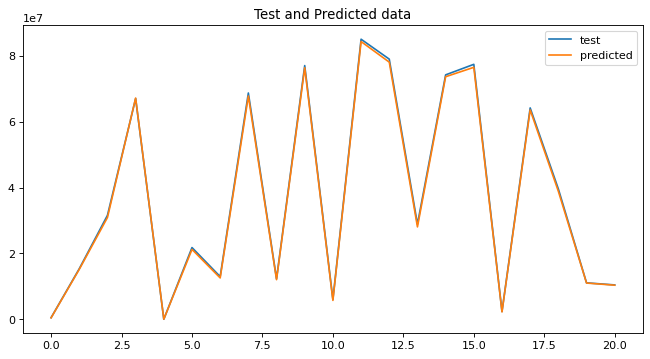

In [62]:
plt.figure(figsize=(10, 5), dpi=80)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, predictions, label="predicted")
plt.title("Test and Predicted data")
plt.legend()
plt.show()

In [63]:
sample_X = X_test[2].reshape(1, -1)
actual_value = y_test.iloc[2] 
predicted_value = reg_mod.predict(sample_X)

print(f"Actual Number: {actual_value}")
print(f"Predict Number: {predicted_value[0]}")

Actual Number: 31563328.0
Predict Number: 30896468.0


In [64]:
country_vaccinations.sample(1)

,country,country_encoded,date,Year,Month,Day,vaccines,vaccines_encoded,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
27382,Sweden,141,2020-12-29,2020,12,29,"Oxford/AstraZeneca, Pfizer/BioNTech",24,3.947285e+06,2.556731e+06,1.390554e+06,423087.521599,1961.0,39.08654,25.316053,13.767992,194.0


In [65]:
X2 = country_vaccinations.drop(columns=['country', 'date', 'vaccines',
                     'total_vaccinations', 'Year','Month' ,'Day', 'vaccines_encoded',                            
                            'total_vaccinations_per_hundred',
                            'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred' , 'daily_vaccinations_per_million'], axis=1)
y2 = country_vaccinations['total_vaccinations']

In [66]:
X2.sample(1)

,country_encoded,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations
11499,57,166469.0,1898.0,920.0,894.0


In [67]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.01, random_state = 4)

In [68]:
SC = StandardScaler()
X_train_S = SC.fit_transform(X_train2[['people_vaccinated','people_fully_vaccinated','daily_vaccinations_raw','daily_vaccinations']])
X_test_S = SC.transform(X_test2[['people_vaccinated','people_fully_vaccinated','daily_vaccinations_raw','daily_vaccinations']])

In [69]:
X_train_S = pd.DataFrame(X_train_S, columns=['people_vaccinated','people_fully_vaccinated', 'daily_vaccinations_raw','daily_vaccinations'])
X_test_S = pd.DataFrame(X_test_S, columns=['people_vaccinated','people_fully_vaccinated', 'daily_vaccinations_raw','daily_vaccinations'])

X_train_S['country_encoded'] = X_train2['country_encoded'].values
X_test_S['country_encoded'] = X_test2['country_encoded'].values

In [70]:
X_train_S.sample(1)

,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,country_encoded
24820,-0.138807,-0.135472,-0.11619,-0.110851,117


In [71]:
X_test_S.sample(1)

,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,country_encoded
111,-0.149712,-0.163509,-0.140108,-0.132702,80


In [72]:
print(X_train_S.shape)
print(y_train2.shape)
print(X_test_S.shape)
print(y_test2.shape)

(25176, 5)
(25176,)
(255, 5)
(255,)


In [73]:
reg_mod = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.06,
    subsample=0.7,
    colsample_bytree=1, 
    max_depth=4,
    gamma=1,)
reg_mod.fit(X_train_S, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.06, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [74]:
scores = cross_val_score(reg_mod, X_train_S, y_train2,cv=10)
print("Mean cross-validation score: %.5f" % scores.mean())

Mean cross-validation score: 0.82595


In [75]:
reg_mod.fit(X_train_S,y_train2)
predictions = reg_mod.predict(X_test_S)

In [76]:
r2_XGB = np.sqrt(r2_score(y_test2, predictions))
print("R_Squared Score in XGB : %f" % (r2_XGB))

R_Squared Score in XGB : 0.994523


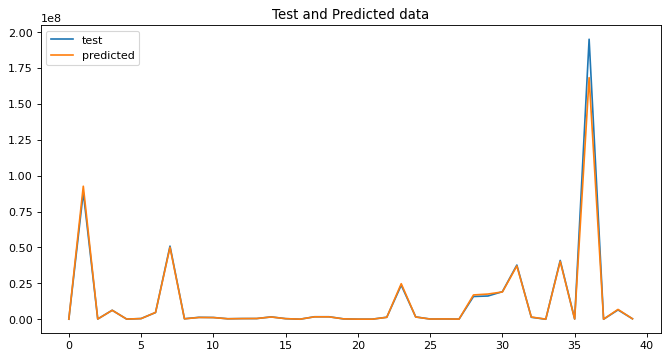

In [77]:
plt.figure(figsize=(10, 5), dpi=80)
x_ax = range(len(y_test2[:40]))
plt.plot(x_ax, y_test2[:40], label="test")
plt.plot(x_ax, predictions[:40], label="predicted")
plt.title("Test and Predicted data")
plt.legend()
plt.show()

In [78]:
sample_X = X_test_S.iloc[2].values.reshape(1, -1)
actual_value = y_test2.iloc[2] 
predicted_value = reg_mod.predict(sample_X)

print(f"Actual Number: {actual_value}")
print(f"Predict Number: {predicted_value[0]}")

Actual Number: 168383.37443440573
Predict Number: 165918.234375


In [79]:
df = country_vaccinations[country_vaccinations.country == 'Germany'].copy()

In [80]:
X = df.drop(columns=['country_encoded','country', 'date', 'vaccines',
                     'total_vaccinations', 'Year','Month' ,'Day', 'vaccines_encoded',                            
                            'total_vaccinations_per_hundred', 'people_vaccinated',
                            'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred' , 'daily_vaccinations_per_million'], axis=1)
y = df['total_vaccinations']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 4)

In [82]:
X_test.iloc[2].values

array([6961731.,  842514.,  680890.])

In [83]:
y_test.iloc[2]

31563328.0

In [84]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [85]:
print(f"Actual Number  : {y_test.iloc[2]}")
print(f"Predict Number: {regressor.predict((X_test.iloc[2].values).reshape(1, -1))}")

Actual Number  : 31563328.0
Predict Number: [31692850.9]


In [86]:
y_pred = regressor.predict(X_test)
r2_RF = r2_score(y_test, y_pred)
print(f"R_Squared in XGB : {r2_XGB}")
print(f"R-squared in RF  : {r2_RF}")

R_Squared in XGB : 0.9945226792053543
R-squared in RF  : 0.9963132845989244
